In [2]:
import pandas as pd
import geopandas as gp
import datetime
import dateutil
import csv
import matplotlib.pylab as plt
from shapely.geometry import Point
%matplotlib inline

# Uber data is downloaded from - 
 https://github.com/fivethirtyeight/uber-tlc-foil-response

# Borough Shapefile

In [6]:
boro = gp.read_file("Boroughs/boroughs.shp")
boro.to_crs(epsg=4326, inplace=True)

In [7]:
crs = {'init': 'epsg:4326'}
boro = gp.GeoDataFrame(boro, crs=crs)

In [8]:
boro

,BoroCode,BoroName,OBJECTID,Shape_Area,Shape_Le_1,Shape_Leng,geometry
0,5,Staten Island,1,1.601777e+09,515030.937768,515044.489949,(POLYGON ((-74.05050806375598 40.5664220339433...
1,3,Brooklyn,2,1.956933e+09,775973.027606,775986.244846,(POLYGON ((-73.85967072834107 40.5859679481642...
2,4,Queens,3,3.030316e+09,977524.253377,977551.995842,(POLYGON ((-73.83668274106887 40.5949466970647...
3,2,Bronx,4,1.171020e+09,610591.279365,610601.565351,(POLYGON ((-73.89680883252932 40.7958084454756...
4,1,Manhattan,5,6.306731e+08,387822.772473,387824.258158,(POLYGON ((-74.01092841220206 40.6844914721829...


# Uber 2014 data

In [207]:
apr14 = pd.read_csv("Data/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv",
                     parse_dates= ['Date/Time'])
may14 = pd.read_csv('Data/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-may14.csv', 
                    parse_dates=['Date/Time'])
jun14 = pd.read_csv('Data/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-jun14.csv', 
                    parse_dates=['Date/Time'])
july14 = pd.read_csv('Data/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-jul14.csv', 
                    parse_dates=['Date/Time'])
aug14 = pd.read_csv('Data/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-aug14.csv', 
                    parse_dates=['Date/Time'])
sep14 = pd.read_csv('Data/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-sep14.csv', 
                    parse_dates=['Date/Time'])

# Uber 14 clearing up

In [208]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(apr14.Lon, apr14.Lat)]
apr14 = apr14.drop(['Lon', 'Lat'], axis=1)
apr14 = gp.GeoDataFrame(apr14, crs=crs, geometry=geometry)

geometry = [Point(xy) for xy in zip(may14.Lon, may14.Lat)]
may14 = may14.drop(['Lon', 'Lat'], axis=1)
may14 = gp.GeoDataFrame(may14, crs=crs, geometry=geometry)

geometry = [Point(xy) for xy in zip(jun14.Lon, jun14.Lat)]
jun14 = jun14.drop(['Lon', 'Lat'], axis=1)
jun14 = gp.GeoDataFrame(jun14, crs=crs, geometry=geometry)

geometry = [Point(xy) for xy in zip(july14.Lon, july14.Lat)]
july14 = july14.drop(['Lon', 'Lat'], axis=1)
july14 = gp.GeoDataFrame(july14, crs=crs, geometry=geometry)

geometry = [Point(xy) for xy in zip(aug14.Lon, aug14.Lat)]
aug14 = aug14.drop(['Lon', 'Lat'], axis=1)
aug14 = gp.GeoDataFrame(aug14, crs=crs, geometry=geometry)

geometry = [Point(xy) for xy in zip(sep14.Lon, sep14.Lat)]
sep14 = sep14.drop(['Lon', 'Lat'], axis=1)
sep14 = gp.GeoDataFrame(sep14, crs=crs, geometry=geometry)

Merge Uber and Borough

In [209]:
apr14 = gp.sjoin(boro, apr14)
may14 = gp.sjoin(boro, may14)
jun14 = gp.sjoin(boro, jun14)
july14 = gp.sjoin(boro, july14)
aug14 = gp.sjoin(boro, aug14)
sep14 = gp.sjoin(boro, sep14)

In [210]:
apr14 = apr14.set_index('Date/Time').groupby([pd.TimeGrouper('D'),'BoroName']).count()
apr14.reset_index('BoroName', inplace = True)
apr14.drop(['BoroCode','Shape_Area', 'Shape_Le_1', 
            'Shape_Leng', 'geometry', 'index_right', 'Base'], axis = 1, inplace = True)
apr14.columns = ['BoroName', 'counts']

may14 = may14.set_index('Date/Time').groupby([pd.TimeGrouper('D'),'BoroName']).count()
may14.reset_index('BoroName', inplace = True)
may14.drop(['BoroCode','Shape_Area', 'Shape_Le_1', 
            'Shape_Leng', 'geometry', 'index_right', 'Base'], axis = 1, inplace = True)
may14.columns = ['BoroName', 'counts']

jun14 = jun14.set_index('Date/Time').groupby([pd.TimeGrouper('D'),'BoroName']).count()
jun14.reset_index('BoroName', inplace = True)
jun14.drop(['BoroCode','Shape_Area', 'Shape_Le_1', 
            'Shape_Leng', 'geometry', 'index_right', 'Base'], axis = 1, inplace = True)
jun14.columns = ['BoroName', 'counts']

july14 = july14.set_index('Date/Time').groupby([pd.TimeGrouper('D'),'BoroName']).count()
july14.reset_index('BoroName', inplace = True)
july14.drop(['BoroCode','Shape_Area', 'Shape_Le_1', 
            'Shape_Leng', 'geometry', 'index_right', 'Base'], axis = 1, inplace = True)
july14.columns = ['BoroName', 'counts']

aug14 = aug14.set_index('Date/Time').groupby([pd.TimeGrouper('D'),'BoroName']).count()
aug14.reset_index('BoroName', inplace = True)
aug14.drop(['BoroCode','Shape_Area', 'Shape_Le_1', 
            'Shape_Leng', 'geometry', 'index_right', 'Base'], axis = 1, inplace = True)
aug14.columns = ['BoroName', 'counts']

sep14 = sep14.set_index('Date/Time').groupby([pd.TimeGrouper('D'),'BoroName']).count()
sep14.reset_index('BoroName', inplace = True)
sep14.drop(['BoroCode','Shape_Area', 'Shape_Le_1', 
            'Shape_Leng', 'geometry', 'index_right', 'Base'], axis = 1, inplace = True)
sep14.columns = ['BoroName', 'counts']

In [223]:
uber_14 = pd.concat([apr14, may14, jun14, july14, aug14, sep14])

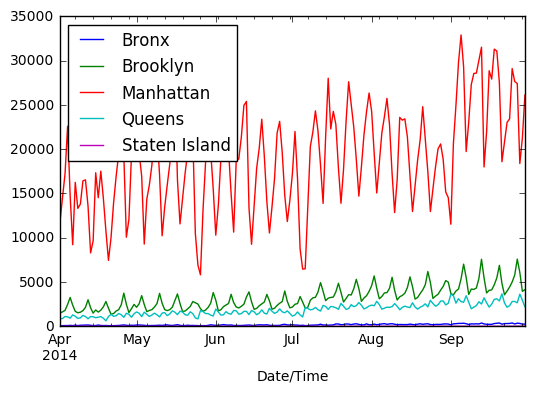

In [226]:
for boro in (uber_14.BoroName.unique()):
    uber_14[uber_14.BoroName == boro]['counts'].plot(label = boro)
plt.legend(loc = 'best')

# Uber 2015 data

In [ ]:
uber_15 = pd.read_csv("Data/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-janjune-15.csv", 
                                parse_dates= ['Pickup_date'])

In [9]:
uber_15.head(3)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100


# Taxi zones geocoded data

In [37]:
tzones = gp.read_file("taxi_zones/taxi_zones_updated.shp")

In [38]:
tzones.head(3)

,LocationID,OBJECTID,Shape_Area,Shape_Leng,borough,geometry,zone
0,1,1,0.000782,0.116357,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",Newark Airport
1,2,2,0.004866,0.433470,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",Jamaica Bay
2,3,3,0.000314,0.084341,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",Allerton/Pelham Gardens


In [39]:
len(tzones.LocationID.unique())

263

# Merge taxi zones and uber15 data

In [42]:
uber_15_geo = (pd.merge(uber_15, tzones, how='left', left_on='locationID', 
                       right_on='LocationID'))

In [43]:
uber_15_geo.drop(['OBJECTID', 'Shape_Area','Shape_Leng', 'Dispatching_base_num', 'Affiliated_base_num'], inplace = True, axis = 1)

In [44]:
uber_15_geo.head(3)

,Pickup_date,locationID,LocationID,borough,geometry,zone
0,2015-05-17 09:47:00,141,141.0,Manhattan,"POLYGON ((994839.0728694797 216123.6982985735,...",Lenox Hill West
1,2015-05-17 09:47:00,65,65.0,Brooklyn,"POLYGON ((987819.9802388698 194536.7612423003,...",Downtown Brooklyn/MetroTech
2,2015-05-17 09:47:00,100,100.0,Manhattan,"POLYGON ((987770.527455166 212686.6776765436, ...",Garment District


In [56]:
uber_15_geo.dropna(inplace=True)

In [78]:
uber_borough = uber_15_geo.set_index('Pickup_date','borough').groupby([pd.TimeGrouper('D'),'borough']).count()

In [80]:
uber_borough.reset_index('borough', inplace=True)

In [229]:
uber_15 = uber_borough.drop(['LocationID','geometry', 'zone', 'date'], axis = 1)
uber_15.columns = ['BoroName', 'counts']

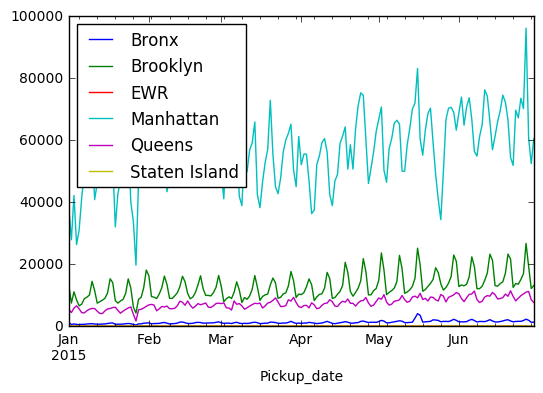

In [231]:
for boro in (uber_15.BoroName.unique()):
    uber_15[uber_15.BoroName == boro]['counts'].plot(label = boro)
plt.legend(loc = 'best')

# Merge Uber 14 and 15

In [232]:
uber = pd.concat([uber_14, uber_15])

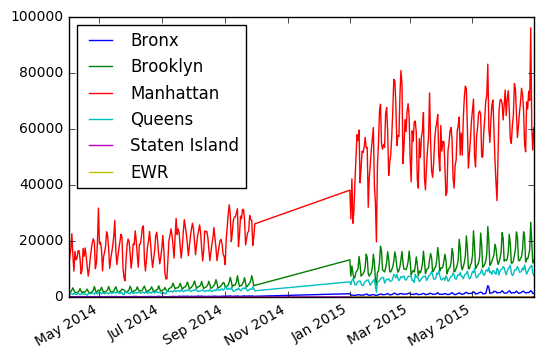

In [239]:
for boro in (uber.BoroName.unique()):
    uber[uber.BoroName == boro]['counts'].plot(label = boro)
plt.legend(loc = 'best')